<a href="https://colab.research.google.com/github/KenjiH7/seminar/blob/master/%E5%8D%92%E6%A5%AD%E8%AB%96%E6%96%87_M%26A_Analysis_(Kenji_Hosooka).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import scipy.stats as stats

In [3]:
fileDownloaded = drive.CreateFile({'id': '1_jCuJ0gIUZ0kcWCLoBRm3GgSWJTt77cy'})
fileDownloaded.GetContentFile('M&A All Sectors.csv')

In [4]:
df = pd.read_csv('M&A All Sectors.csv',encoding = "cp932")
df.head()

,発表日,ﾀｰｹﾞｯﾄ会社名,買収側の社名,ﾀｰｹﾞｯﾄ企業 産業ｾｸﾀｰ,買収側企業 産業ｾｸﾀｰ,発表時ﾃﾞｨｰﾙ総額(百万),発表ﾌﾟﾚﾐｱﾑ,ﾀｰｹﾞｯﾄ企業 EBITDA,買収側企業 EBITDA,ﾀｰｹﾞｯﾄ企業 株主資本利益率(ROE),買収側企業 株主資本利益率(ROE),ﾀｰｹﾞｯﾄ企業 財務ﾚﾊﾞﾚｯｼﾞ,買収側企業 財務ﾚﾊﾞﾚｯｼﾞ,ﾀｰｹﾞｯﾄ企業 流動比率,買収側企業 流動比率,ﾀｰｹﾞｯﾄ企業 売上高 5年平均成長率,買収側企業 売上高 5年平均成長率,ﾀｰｹﾞｯﾄ企業 EBITDA時価総額 5年平均成長率,買収側企業 EBITDA時価総額 5年平均成長率,Acquirer Country/Region
0,12/08/2023,合同会社杜の都バイオマスエナジー,レノバ,公益事業,ｴﾈﾙｷﾞｰ,11.30,NaN,NaN,135.13400,NaN,1.18806,NaN,8.01187,NaN,3.144670,NaN,NaN,NaN,NaN,日本
1,12/04/2023,株式会社さつまゴルフリゾート,Showgolf Inc,消費(景気循環型),消費(景気循環型),11.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,韓国
2,12/04/2023,Higashi Kobe Center Building/Tokoyo,スターアジア不動産投資法人,金融業,金融業,1.09,NaN,NaN,58.52980,NaN,5.88377,NaN,2.02357,NaN,0.694817,NaN,19.99500,NaN,-0.583353,日本
3,11/30/2023,土地及び建物/東京都目黒区共同住宅,グローバル・リンク・マネジメント,金融業,消費(非景気循環型),13.59,NaN,NaN,20.67270,NaN,30.96400,NaN,4.63290,NaN,2.097500,NaN,15.75230,NaN,-0.930303,日本
4,11/30/2023,タロスシステムズ,シンシア,ﾃｸﾉﾛｼﾞｰ,消費(非景気循環型),2.52,NaN,NaN,1.23951,NaN,7.20807,NaN,1.70477,NaN,3.477340,NaN,5.15994,NaN,-1.067090,日本


In [5]:
df = df.rename(columns={'ﾀｰｹﾞｯﾄ会社名':'Target'})
df = df.rename(columns={'買収側の社名':'Acquirer'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 産業ｾｸﾀｰ':'Target Sector'})
df = df.rename(columns={'買収側企業 産業ｾｸﾀｰ':'Acquirer Sector'})
df = df.rename(columns={'発表時ﾃﾞｨｰﾙ総額(百万)':'Trans. Value (US$M)'})
df = df.rename(columns={'発表ﾌﾟﾚﾐｱﾑ':'Premium'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 EBITDA':'Target EBITDA'})
df = df.rename(columns={'買収側企業 EBITDA':'Acquirer EBITDA'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 株主資本利益率(ROE)':'Target ROE'})
df = df.rename(columns={'買収側企業 株主資本利益率(ROE)':'Acquirer ROE'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 財務ﾚﾊﾞﾚｯｼﾞ':'Target Leverage'})
df = df.rename(columns={'買収側企業 財務ﾚﾊﾞﾚｯｼﾞ':'Acquirer Leverage'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 流動比率':'Target Current Ratio'})
df = df.rename(columns={'買収側企業 流動比率':'Acquirer Current Ratio'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 売上高 5年平均成長率':'Target Revenue Growth(5y Avg.)'})
df = df.rename(columns={'買収側企業 売上高 5年平均成長率':'Acquirer Revenue Growth(5y Avg.)'})
df = df.rename(columns={'ﾀｰｹﾞｯﾄ企業 EBITDA時価総額 5年平均成長率':'Target EBITDA Growth(5y Avg.)'})
df = df.rename(columns={'買収側企業 EBITDA時価総額 5年平均成長率':'Acquirer EBITDA Growth(5y Avg.)'})
df.head()

,発表日,Target,Acquirer,Target Sector,Acquirer Sector,Trans. Value (US$M),Premium,Target EBITDA,Acquirer EBITDA,Target ROE,Acquirer ROE,Target Leverage,Acquirer Leverage,Target Current Ratio,Acquirer Current Ratio,Target Revenue Growth(5y Avg.),Acquirer Revenue Growth(5y Avg.),Target EBITDA Growth(5y Avg.),Acquirer EBITDA Growth(5y Avg.),Acquirer Country/Region
0,12/08/2023,合同会社杜の都バイオマスエナジー,レノバ,公益事業,ｴﾈﾙｷﾞｰ,11.30,NaN,NaN,135.13400,NaN,1.18806,NaN,8.01187,NaN,3.144670,NaN,NaN,NaN,NaN,日本
1,12/04/2023,株式会社さつまゴルフリゾート,Showgolf Inc,消費(景気循環型),消費(景気循環型),11.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,韓国
2,12/04/2023,Higashi Kobe Center Building/Tokoyo,スターアジア不動産投資法人,金融業,金融業,1.09,NaN,NaN,58.52980,NaN,5.88377,NaN,2.02357,NaN,0.694817,NaN,19.99500,NaN,-0.583353,日本
3,11/30/2023,土地及び建物/東京都目黒区共同住宅,グローバル・リンク・マネジメント,金融業,消費(非景気循環型),13.59,NaN,NaN,20.67270,NaN,30.96400,NaN,4.63290,NaN,2.097500,NaN,15.75230,NaN,-0.930303,日本
4,11/30/2023,タロスシステムズ,シンシア,ﾃｸﾉﾛｼﾞｰ,消費(非景気循環型),2.52,NaN,NaN,1.23951,NaN,7.20807,NaN,1.70477,NaN,3.477340,NaN,5.15994,NaN,-1.067090,日本


In [6]:
import numpy as np
df['log Target EBITDA'] = np.log(df['Target EBITDA']+1)
df['log Acquirer EBITDA'] = np.log(df['Acquirer EBITDA']+1)
df['log Target ROE'] = np.log(df['Target ROE']+1)
df['log Acquirer ROE'] = np.log(df['Acquirer ROE']+1)
df['log Target Leverage'] = np.log(df['Target Leverage']+1)
df['log Acquirer Leverage'] = np.log(df['Acquirer Leverage']+1)
df['log Target Current Ratio'] = np.log(df['Target Current Ratio']+1)
df['log Acquirer Current Ratio'] = np.log(df['Acquirer Current Ratio']+1)
df['log Target Revenue Growth(5y Avg.)'] = np.log(df['Target Revenue Growth(5y Avg.)']+1)
df['log Acquirer Revenue Growth(5y Avg.)'] = np.log(df['Acquirer Revenue Growth(5y Avg.)']+1)
df['log Target EBITDA Growth(5y Avg.)'] = np.log(df['Target EBITDA Growth(5y Avg.)']+1)
df['log Acquirer EBITDA Growth(5y Avg.)'] = np.log(df['Acquirer EBITDA Growth(5y Avg.)']+1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(uf

In [7]:
"""
plt.scatter(df['log Target EBITDA'], df['log Acquirer EBITDA'])
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.title('Scatter Plot')

# 2つの変数のデータを用意する
x = np.array(df['log Target EBITDA'])
y = np.array(df['log Acquirer EBITDA'])

print("x=",x)
print(len(x))
print("y=",y)

def count_numeric_elements(x):
  return np.sum(~np.isnan(x))

count_x = count_numeric_elements(x)
count_y = count_numeric_elements(y)

print("count_x=", count_x)
print("count_y=",count_y)

def calculate_correlation(x, y):
    # NaNが含まれる要素を除外
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x_filtered = x[valid_indices]
    y_filtered = y[valid_indices]

    print("x_filtered=",x_filtered)
    print("y_filtered=",y_filtered)

    # 相関係数を計算
    r = np.corrcoef(x_filtered, y_filtered)[0, 1]
    return r


# 相関係数を求める
corr = calculate_correlation(x,y)
print("correlation=",corr)

# NaNが含まれる要素を除外
valid_indices = ~np.isnan(x) & ~np.isnan(y)
x_filtered = x[valid_indices]
y_filtered = y[valid_indices]

# 近似直線を求める
slope, intercept, r_value, p_value, std_err = stats.linregress(x_filtered, y_filtered)

# 近似直線のプロット
plt.scatter(x_filtered, y_filtered, label='Data Points')
plt.plot(x_filtered, slope * x_filtered + intercept, color='red',
         label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}\nCorrelation coefficient (r): {r_value:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit to Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

# 近似線を描画する
plt.scatter(x, y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='red')

print(f'相関係数: {corr:.2f}')
plt.show()
"""

'\nplt.scatter(df[\'log Target EBITDA\'], df[\'log Acquirer EBITDA\'])\nplt.xlabel(\'log Target EBITDA\')\nplt.ylabel(\'log Acquirer EBITDA\')\nplt.title(\'Scatter Plot\')\n\n# 2つの変数のデータを用意する\nx = np.array(df[\'log Target EBITDA\'])\ny = np.array(df[\'log Acquirer EBITDA\'])\n\nprint("x=",x)\nprint(len(x))\nprint("y=",y)\n\ndef count_numeric_elements(x):\n  return np.sum(~np.isnan(x))\n\ncount_x = count_numeric_elements(x)\ncount_y = count_numeric_elements(y)\n\nprint("count_x=", count_x)\nprint("count_y=",count_y)\n\ndef calculate_correlation(x, y):\n    # NaNが含まれる要素を除外\n    valid_indices = ~np.isnan(x) & ~np.isnan(y)\n    x_filtered = x[valid_indices]\n    y_filtered = y[valid_indices]\n\n    print("x_filtered=",x_filtered)\n    print("y_filtered=",y_filtered)\n\n    # 相関係数を計算\n    r = np.corrcoef(x_filtered, y_filtered)[0, 1]\n    return r\n\n\n# 相関係数を求める\ncorr = calculate_correlation(x,y)\nprint("correlation=",corr)\n\n# NaNが含まれる要素を除外\nvalid_indices = ~np.isnan(x) & ~np.isnan(y)\nx

In [8]:
# 関数の定義

def plot_scatter(x,y):
  # NaNが含まれる要素を除外
  valid_indices = ~np.isnan(x) & ~np.isnan(y)
  x_filtered = x[valid_indices]
  y_filtered = y[valid_indices]

  # 近似直線を求める
  slope, intercept, r_value, p_value, std_err = stats.linregress(x_filtered, y_filtered)

  # 近似直線のプロット
  plt.scatter(x_filtered, y_filtered, label='Data Points')
  plt.plot(x_filtered, slope * x_filtered + intercept, color='red',
          label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}\nCorrelation coefficient (r): {r_value:.2f}')
  # plt.xlabel('X')
  # plt.ylabel('Y')
  plt.legend()
  plt.grid(True)
  # plt.show()

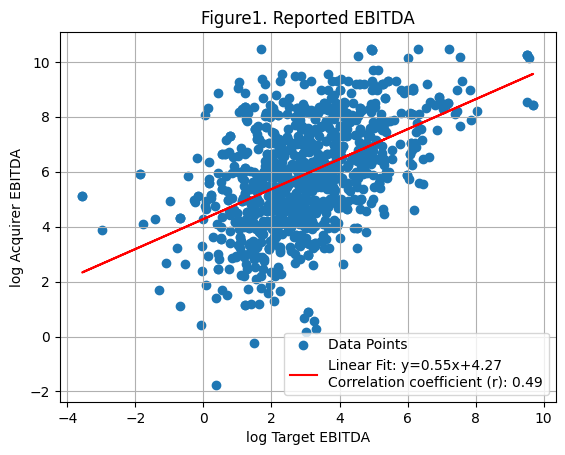

In [29]:
# プロットしたい配列をx,yに代入
x = np.array(df['log Target EBITDA'])
y = np.array(df['log Acquirer EBITDA'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.title('Figure1. Reported EBITDA')
plt.show()

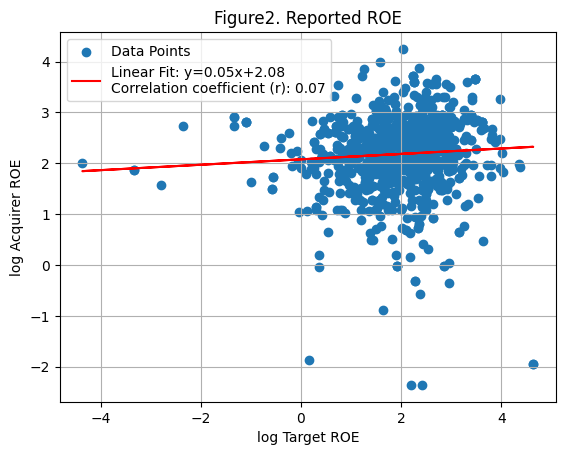

In [30]:
"""
plt.scatter(df['log Target ROE'], df['log Acquirer ROE'])
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.title('Scatter Plot')

plt.show()
"""

x = df['log Target ROE']
y = df['log Acquirer ROE']

plot_scatter(x,y) # これ関数
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.title('Figure2. Reported ROE')
plt.show()

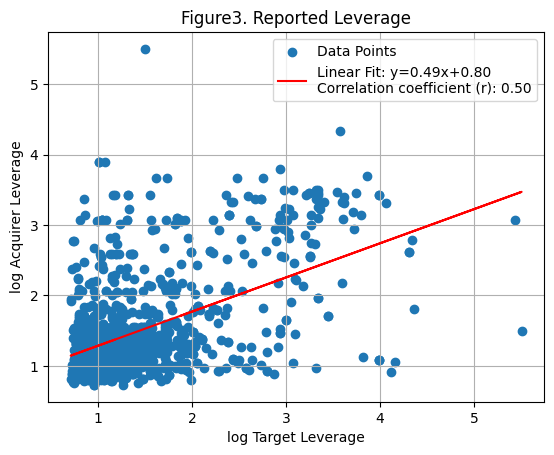

In [31]:
"""
plt.scatter(df['log Target Leverage'], df['log Acquirer Leverage'])
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.title('Scatter Plot')
plt.show()
"""

x = df['log Target Leverage']
y = df['log Acquirer Leverage']

plot_scatter(x,y) # これ関数
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.title('Figure3. Reported Leverage')
plt.show()

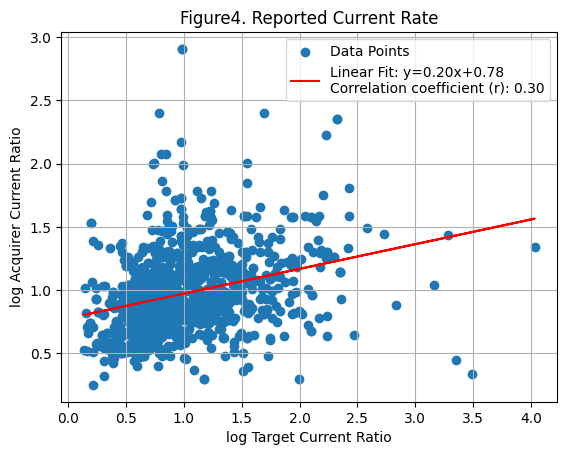

In [32]:
"""
plt.scatter(df['log Target Current Ratio'], df['log Acquirer Current Ratio'])
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.title('Scatter Plot')
plt.show()
"""

x = df['log Target Current Ratio']
y = df['log Acquirer Current Ratio']

plot_scatter(x,y) # これ関数
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.title('Figure4. Reported Current Rate')
plt.show()

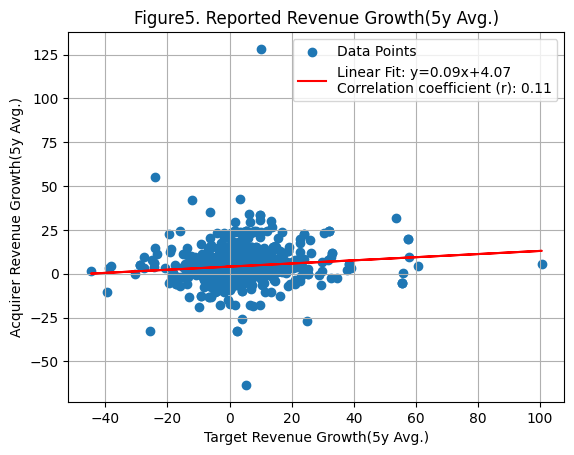

In [33]:
"""
plt.scatter(df['Target Revenue Growth(5y Avg.)'], df['Acquirer Revenue Growth(5y Avg.)'])
plt.xlabel('log Target Revenue Growth(5y Avg.)')
plt.ylabel('log Acquirer Revenue Growth(5y Avg.)')
plt.title('Scatter Plot')
plt.show()
"""

x = df['Target Revenue Growth(5y Avg.)']
y = df['Acquirer Revenue Growth(5y Avg.)']

plot_scatter(x,y) # これ関数
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.title('Figure5. Reported Revenue Growth(5y Avg.)')
plt.show()

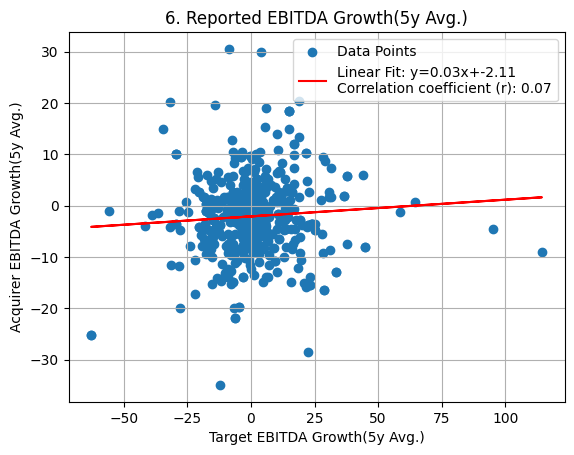

In [14]:
"""
plt.scatter(df['Target EBITDA Growth(5y Avg.)'], df['Acquirer EBITDA Growth(5y Avg.)'])
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.title('Scatter Plot')
plt.show()
"""

x = df['Target EBITDA Growth(5y Avg.)']
y = df['Acquirer EBITDA Growth(5y Avg.)']

plot_scatter(x,y) # これ関数
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.title('6. Reported EBITDA Growth(5y Avg.)')
plt.show()

In [15]:
df = df.drop(columns={'Target'})
df = df.drop(columns={'Acquirer'})
df = df.drop(columns={'Acquirer Sector'})
df.head()

,発表日,Target Sector,Trans. Value (US$M),Premium,Target EBITDA,Acquirer EBITDA,Target ROE,Acquirer ROE,Target Leverage,Acquirer Leverage,...,log Target ROE,log Acquirer ROE,log Target Leverage,log Acquirer Leverage,log Target Current Ratio,log Acquirer Current Ratio,log Target Revenue Growth(5y Avg.),log Acquirer Revenue Growth(5y Avg.),log Target EBITDA Growth(5y Avg.),log Acquirer EBITDA Growth(5y Avg.)
0,12/08/2023,公益事業,11.30,NaN,NaN,135.13400,NaN,1.18806,NaN,8.01187,...,NaN,0.783015,NaN,2.198543,NaN,1.421823,NaN,NaN,NaN,NaN
1,12/04/2023,消費(景気循環型),11.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/04/2023,金融業,1.09,NaN,NaN,58.52980,NaN,5.88377,NaN,2.02357,...,NaN,1.929166,NaN,1.106438,NaN,0.527575,NaN,3.044284,NaN,-0.875516
3,11/30/2023,金融業,13.59,NaN,NaN,20.67270,NaN,30.96400,NaN,4.63290,...,NaN,3.464610,NaN,1.728624,NaN,1.130595,NaN,2.818536,NaN,-2.663598
4,11/30/2023,ﾃｸﾉﾛｼﾞｰ,2.52,NaN,NaN,1.23951,NaN,7.20807,NaN,1.70477,...,NaN,2.105118,NaN,0.995017,NaN,1.499029,NaN,1.818067,NaN,NaN


In [16]:
Msearch_words = ['消費', '工業', '基礎資材']
M_df = df[df['Target Sector'].str.contains('|'.join(Msearch_words))]
M_df.head()

,発表日,Target Sector,Trans. Value (US$M),Premium,Target EBITDA,Acquirer EBITDA,Target ROE,Acquirer ROE,Target Leverage,Acquirer Leverage,...,log Target ROE,log Acquirer ROE,log Target Leverage,log Acquirer Leverage,log Target Current Ratio,log Acquirer Current Ratio,log Target Revenue Growth(5y Avg.),log Acquirer Revenue Growth(5y Avg.),log Target EBITDA Growth(5y Avg.),log Acquirer EBITDA Growth(5y Avg.)
1,12/04/2023,消費(景気循環型),11.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11/09/2023,工業,188.07,25.95,49.8995,489.80800,9.42034,5.08015,2.23952,2.33966,...,2.34376,1.805029,1.175425,1.205869,0.946564,0.843075,-3.876511,0.537396,1.880919,2.79369
10,10/27/2023,消費(非景気循環型),3.16,NaN,NaN,23.40980,NaN,12.80930,NaN,2.11497,...,NaN,2.625342,NaN,1.136220,NaN,1.201211,NaN,0.826808,NaN,NaN
13,10/17/2023,消費(景気循環型),2.34,NaN,NaN,5.48377,NaN,13.20210,NaN,2.09268,...,NaN,2.653390,NaN,1.129038,NaN,1.145474,NaN,2.399376,NaN,NaN
19,09/22/2023,消費(景気循環型),10.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Ssearch_words = ['通信', '多角経営', 'ｴﾈﾙｷﾞｰ','ﾃｸﾉﾛｼﾞｰ','公益事業']
S_df = df[df['Target Sector'].str.contains('|'.join(Ssearch_words))]
S_df.head()

,発表日,Target Sector,Trans. Value (US$M),Premium,Target EBITDA,Acquirer EBITDA,Target ROE,Acquirer ROE,Target Leverage,Acquirer Leverage,...,log Target ROE,log Acquirer ROE,log Target Leverage,log Acquirer Leverage,log Target Current Ratio,log Acquirer Current Ratio,log Target Revenue Growth(5y Avg.),log Acquirer Revenue Growth(5y Avg.),log Target EBITDA Growth(5y Avg.),log Acquirer EBITDA Growth(5y Avg.)
0,12/08/2023,公益事業,11.30,NaN,NaN,135.13400,NaN,1.18806,NaN,8.01187,...,NaN,0.783015,NaN,2.198543,NaN,1.421823,NaN,NaN,NaN,NaN
4,11/30/2023,ﾃｸﾉﾛｼﾞｰ,2.52,NaN,NaN,1.23951,NaN,7.20807,NaN,1.70477,...,NaN,2.105118,NaN,0.995017,NaN,1.499029,NaN,1.818067,NaN,NaN
20,09/22/2023,ﾃｸﾉﾛｼﾞｰ,1.46,NaN,NaN,7.97612,NaN,23.14370,NaN,1.70411,...,NaN,3.184023,NaN,0.994773,NaN,1.013468,NaN,3.428008,NaN,NaN
22,09/14/2023,通信,6.79,NaN,NaN,2.95876,NaN,29.39260,NaN,4.86316,...,NaN,3.414199,NaN,1.768689,NaN,0.949497,NaN,3.089983,NaN,NaN
25,09/12/2023,"金融業, ﾃｸﾉﾛｼﾞｰ",21.14,NaN,NaN,26.96230,NaN,8.56687,NaN,1.08246,...,NaN,2.258306,NaN,0.733550,NaN,2.400383,NaN,2.511508,NaN,NaN


In [18]:
Fsearch_words = ['金融業']
F_df = df[df['Target Sector'].str.contains('|'.join(Fsearch_words))]
F_df.head()

,発表日,Target Sector,Trans. Value (US$M),Premium,Target EBITDA,Acquirer EBITDA,Target ROE,Acquirer ROE,Target Leverage,Acquirer Leverage,...,log Target ROE,log Acquirer ROE,log Target Leverage,log Acquirer Leverage,log Target Current Ratio,log Acquirer Current Ratio,log Target Revenue Growth(5y Avg.),log Acquirer Revenue Growth(5y Avg.),log Target EBITDA Growth(5y Avg.),log Acquirer EBITDA Growth(5y Avg.)
2,12/04/2023,金融業,1.09,NaN,NaN,58.5298,NaN,5.88377,NaN,2.02357,...,NaN,1.929166,NaN,1.106438,NaN,0.527575,NaN,3.044284,NaN,-0.875516
3,11/30/2023,金融業,13.59,NaN,NaN,20.6727,NaN,30.96400,NaN,4.63290,...,NaN,3.464610,NaN,1.728624,NaN,1.130595,NaN,2.818536,NaN,-2.663598
5,11/28/2023,金融業,1.56,NaN,NaN,39.7156,NaN,5.57339,NaN,1.95924,...,NaN,1.883030,NaN,1.084932,NaN,1.201545,NaN,3.394132,NaN,NaN
6,11/20/2023,金融業,15.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11/10/2023,金融業,28.59,NaN,NaN,283.6040,NaN,49.66830,NaN,1.78549,...,NaN,3.925300,NaN,1.024424,NaN,1.224278,NaN,1.573852,NaN,NaN


In [19]:
# Calculate the mean, median, standard deviation, maximum, and minimum of the data
mean = df.mean()
median = df.median()
sd = df.std()
max = df.max()
min = df.min()
# Count the number of non-NaN entries in each column
non_nan_count = df.count()

# Print the results
print(f'The number of non-NaN entries in each column are:\n{non_nan_count}')

# Create a table of the data
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': sd, 'Maximum': max, 'Minimum': min})

# Print the table
print(table)

The number of non-NaN entries in each column are:
発表日                                     12767
Target Sector                           12767
Trans. Value (US$M)                     12767
Premium                                  1728
Target EBITDA                            1676
Acquirer EBITDA                          9045
Target ROE                               2016
Acquirer ROE                             9400
Target Leverage                          1699
Acquirer Leverage                        9252
Target Current Ratio                     1626
Acquirer Current Ratio                   8668
Target Revenue Growth(5y Avg.)           1505
Acquirer Revenue Growth(5y Avg.)         8883
Target EBITDA Growth(5y Avg.)             764
Acquirer EBITDA Growth(5y Avg.)          6793
Acquirer Country/Region                 12767
log Target EBITDA                        1501
log Acquirer EBITDA                      8597
log Target ROE                           1468
log Acquirer ROE              

<ipython-input-19-14a88910a6d2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-19-14a88910a6d2>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()
<ipython-input-19-14a88910a6d2>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd = df.std()


In [20]:
# Calculate the mean, median, standard deviation, maximum, and minimum of the data
mean = M_df.mean()
median = M_df.median()
sd = M_df.std()
max = M_df.max()
min = M_df.min()

# Count the number of non-NaN entries in each column
non_nan_count = M_df.count()

# Print the results
print(f'The number of non-NaN entries in each column are:\n{non_nan_count}')

# Create a table of the data
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': sd, 'Maximum': max, 'Minimum': min})

# Print the table
print(table)

The number of non-NaN entries in each column are:
発表日                                     6163
Target Sector                           6163
Trans. Value (US$M)                     6163
Premium                                 1249
Target EBITDA                           1177
Acquirer EBITDA                         4557
Target ROE                              1396
Acquirer ROE                            4680
Target Leverage                         1122
Acquirer Leverage                       4554
Target Current Ratio                    1205
Acquirer Current Ratio                  4483
Target Revenue Growth(5y Avg.)          1019
Acquirer Revenue Growth(5y Avg.)        4477
Target EBITDA Growth(5y Avg.)            573
Acquirer EBITDA Growth(5y Avg.)         3536
Acquirer Country/Region                 6163
log Target EBITDA                       1058
log Acquirer EBITDA                     4330
log Target ROE                          1007
log Acquirer ROE                        4026
log T

<ipython-input-20-0dfb4283f3e3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = M_df.mean()
<ipython-input-20-0dfb4283f3e3>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = M_df.median()
<ipython-input-20-0dfb4283f3e3>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd = M_df.std()


In [21]:
# Calculate the mean, median, standard deviation, maximum, and minimum of the data
mean = S_df.mean()
median = S_df.median()
sd = S_df.std()
max = S_df.max()
min = S_df.min()

# Count the number of non-NaN entries in each column
non_nan_count = S_df.count()

# Print the results
print(f'The number of non-NaN entries in each column are:\n{non_nan_count}')

# Create a table of the data
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': sd, 'Maximum': max, 'Minimum': min})

# Print the table
print(table)

<ipython-input-21-0d5a817c20f0>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = S_df.mean()
<ipython-input-21-0d5a817c20f0>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = S_df.median()
<ipython-input-21-0d5a817c20f0>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd = S_df.std()


The number of non-NaN entries in each column are:
発表日                                     1991
Target Sector                           1991
Trans. Value (US$M)                     1991
Premium                                  291
Target EBITDA                            320
Acquirer EBITDA                         1581
Target ROE                               362
Acquirer ROE                            1597
Target Leverage                          311
Acquirer Leverage                       1558
Target Current Ratio                     324
Acquirer Current Ratio                  1569
Target Revenue Growth(5y Avg.)           257
Acquirer Revenue Growth(5y Avg.)        1481
Target EBITDA Growth(5y Avg.)            128
Acquirer EBITDA Growth(5y Avg.)         1020
Acquirer Country/Region                 1991
log Target EBITDA                        281
log Acquirer EBITDA                     1432
log Target ROE                           261
log Acquirer ROE                        1291
log T

In [22]:
# Calculate the mean, median, standard deviation, maximum, and minimum of the data
mean = F_df.mean()
median = F_df.median()
sd = F_df.std()
max = F_df.max()
min = F_df.min()

# Count the number of non-NaN entries in each column
non_nan_count = F_df.count()

# Print the results
print(f'The number of non-NaN entries in each column are:\n{non_nan_count}')

# Create a table of the data
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': sd, 'Maximum': max, 'Minimum': min})

# Print the table
print(table)

The number of non-NaN entries in each column are:
発表日                                     4570
Target Sector                           4570
Trans. Value (US$M)                     4570
Premium                                  184
Target EBITDA                            178
Acquirer EBITDA                         2880
Target ROE                               257
Acquirer ROE                            3089
Target Leverage                          266
Acquirer Leverage                       3113
Target Current Ratio                      97
Acquirer Current Ratio                  2590
Target Revenue Growth(5y Avg.)           229
Acquirer Revenue Growth(5y Avg.)        2904
Target EBITDA Growth(5y Avg.)             63
Acquirer EBITDA Growth(5y Avg.)         2219
Acquirer Country/Region                 4570
log Target EBITDA                        161
log Acquirer EBITDA                     2809
log Target ROE                           199
log Acquirer ROE                        2918
log T

<ipython-input-22-0c6b0d7465e8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = F_df.mean()
<ipython-input-22-0c6b0d7465e8>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = F_df.median()
<ipython-input-22-0c6b0d7465e8>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd = F_df.std()


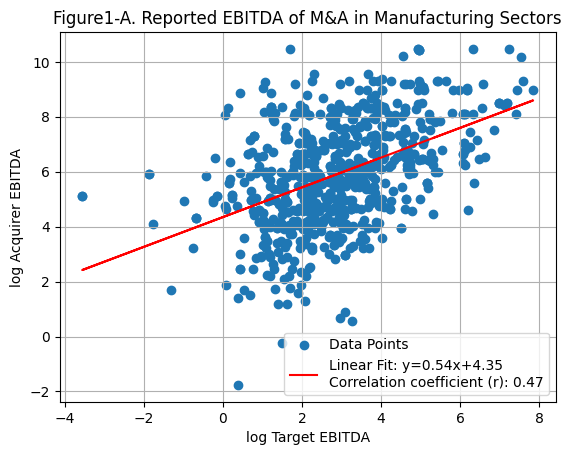

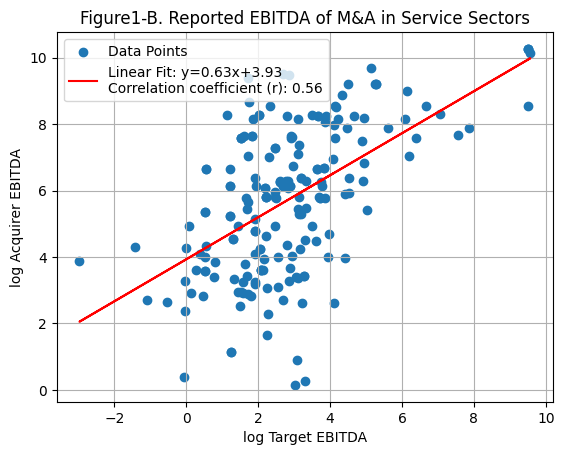

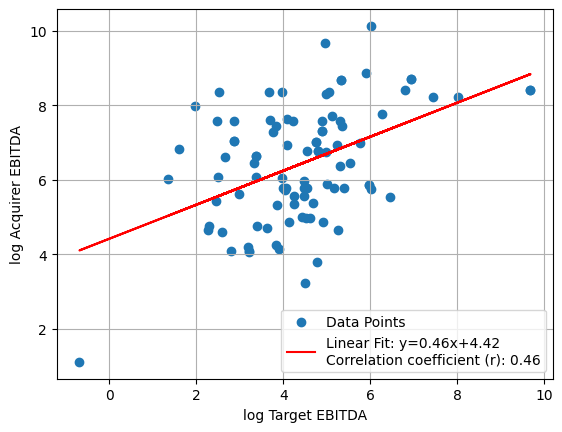

In [36]:
"""
plt.scatter(M_df['log Target EBITDA'], M_df['log Acquirer EBITDA'])
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.title('Manufacturing Scatter Plot')

plt.scatter(S_df['log Target EBITDA'], S_df['log Acquirer EBITDA'])
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.title('Service Scatter Plot')
"""

x = np.array(M_df['log Target EBITDA'])
y = np.array(M_df['log Acquirer EBITDA'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure1-A. Reported EBITDA of M&A in Manufacturing Sectors')
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.show()

x = np.array(S_df['log Target EBITDA'])
y = np.array(S_df['log Acquirer EBITDA'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure1-B. Reported EBITDA of M&A in Service Sectors')
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.show()

x = np.array(F_df['log Target EBITDA'])
y = np.array(F_df['log Acquirer EBITDA'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('log Target EBITDA')
plt.ylabel('log Acquirer EBITDA')
plt.show()

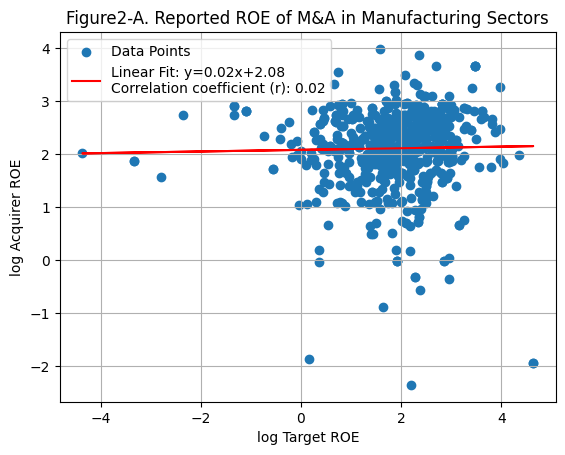

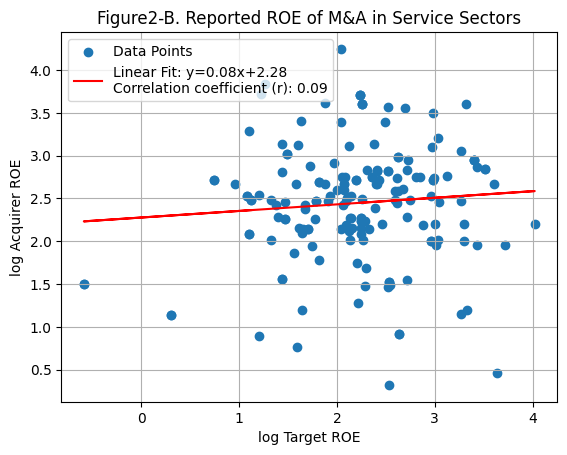

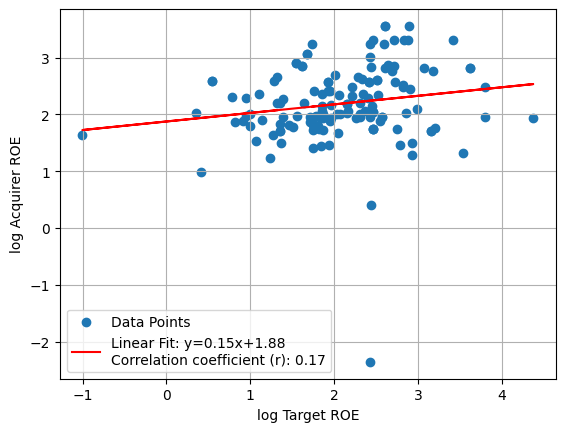

In [38]:
"""
plt.scatter(M_df['log Target ROE'], M_df['log Acquirer ROE'])
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.title('Scatter Plot')

plt.scatter(S_df['log Target ROE'], S_df['log Acquirer ROE'])
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.title('Scatter Plot')
plt.show()
"""

x = np.array(M_df['log Target ROE'])
y = np.array(M_df['log Acquirer ROE'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure2-A. Reported ROE of M&A in Manufacturing Sectors')
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.show()

x = np.array(S_df['log Target ROE'])
y = np.array(S_df['log Acquirer ROE'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure2-B. Reported ROE of M&A in Service Sectors')
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.show()

x = np.array(F_df['log Target ROE'])
y = np.array(F_df['log Acquirer ROE'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('log Target ROE')
plt.ylabel('log Acquirer ROE')
plt.show()

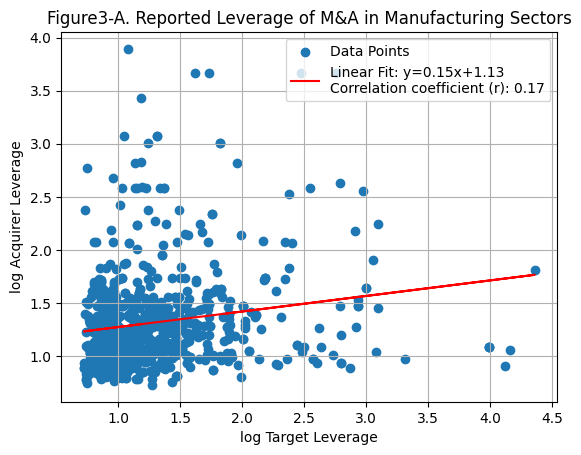

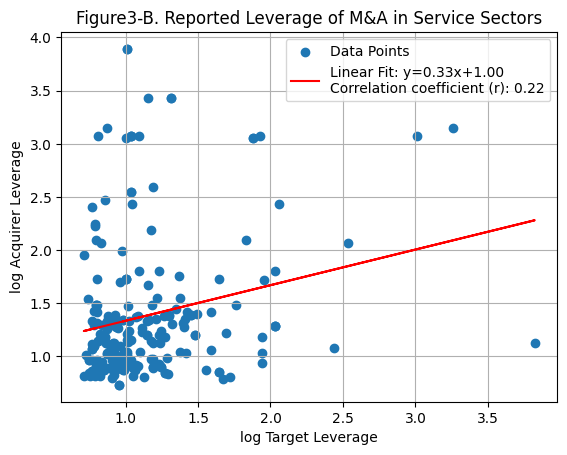

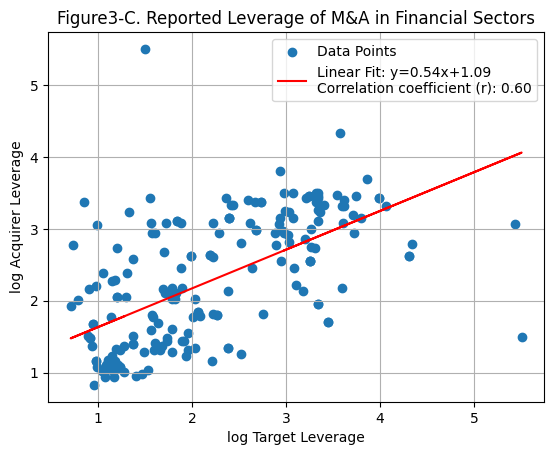

In [37]:
"""
plt.scatter(M_df['log Target Leverage'], M_df['log Acquirer Leverage'])
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.title('Scatter Plot')

plt.scatter(S_df['log Target Leverage'], S_df['log Acquirer Leverage'])
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.title('Scatter Plot')
plt.show()
"""

x = np.array(M_df['log Target Leverage'])
y = np.array(M_df['log Acquirer Leverage'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure3-A. Reported Leverage of M&A in Manufacturing Sectors')
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.show()

x = np.array(S_df['log Target Leverage'])
y = np.array(S_df['log Acquirer Leverage'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure3-B. Reported Leverage of M&A in Service Sectors')
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.show()

x = np.array(F_df['log Target Leverage'])
y = np.array(F_df['log Acquirer Leverage'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure3-C. Reported Leverage of M&A in Financial Sectors')
plt.xlabel('log Target Leverage')
plt.ylabel('log Acquirer Leverage')
plt.show()

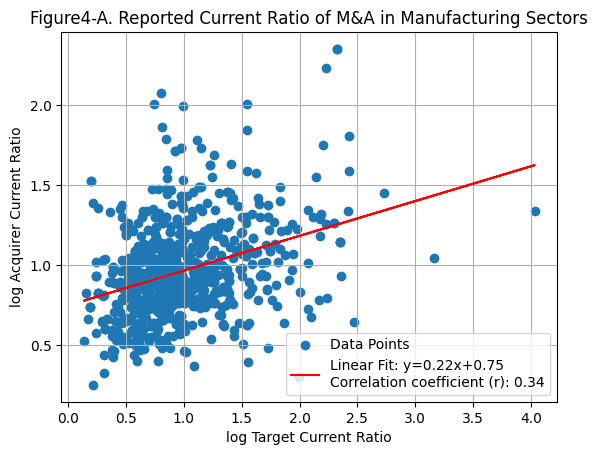

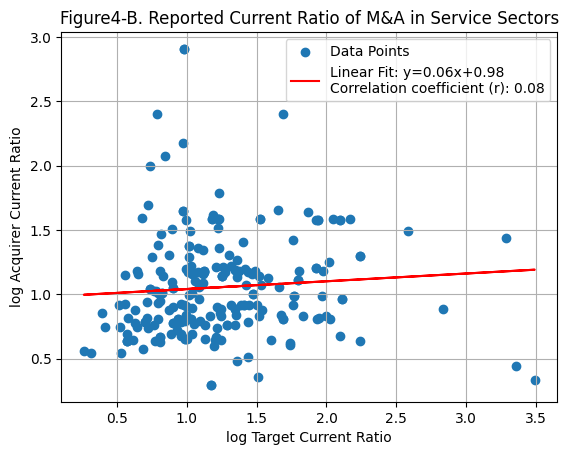

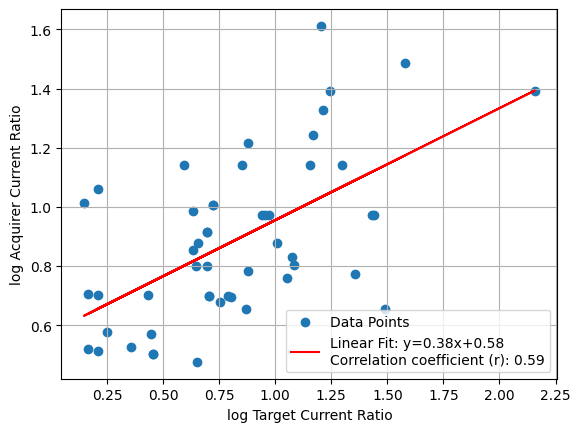

In [40]:
"""
plt.scatter(M_df['log Target Current Ratio'], M_df['log Acquirer Current Ratio'])
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.title('Scatter Plot')

plt.scatter(S_df['log Target Current Ratio'], S_df['log Acquirer Current Ratio'])
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.title('Scatter Plot')
plt.show()
"""
x = np.array(M_df['log Target Current Ratio'])
y = np.array(M_df['log Acquirer Current Ratio'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure4-A. Reported Current Ratio of M&A in Manufacturing Sectors')
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.show()

x = np.array(S_df['log Target Current Ratio'])
y = np.array(S_df['log Acquirer Current Ratio'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure4-B. Reported Current Ratio of M&A in Service Sectors')
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.show()

x = np.array(F_df['log Target Current Ratio'])
y = np.array(F_df['log Acquirer Current Ratio'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('log Target Current Ratio')
plt.ylabel('log Acquirer Current Ratio')
plt.show()

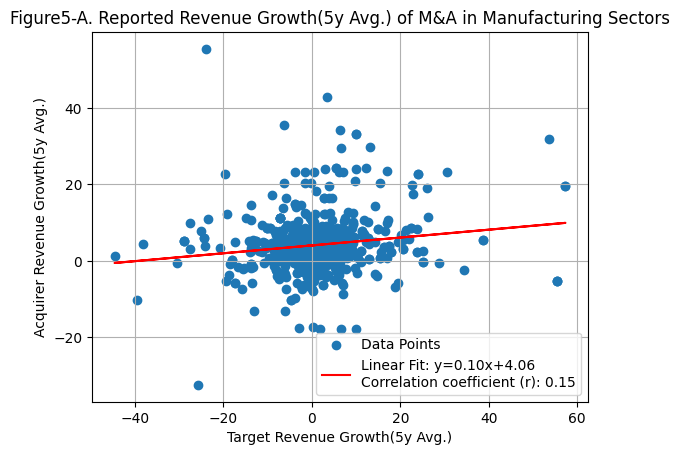

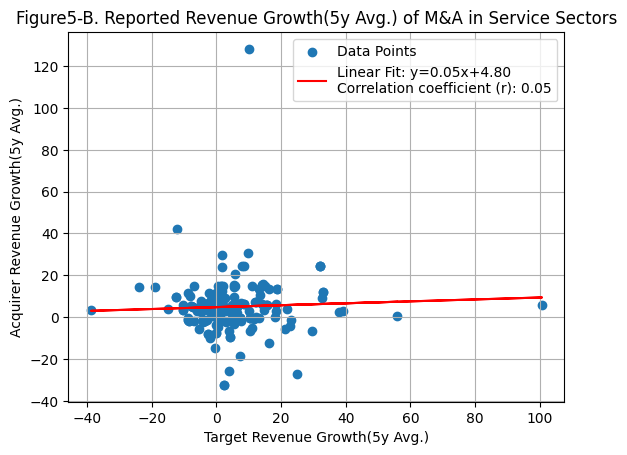

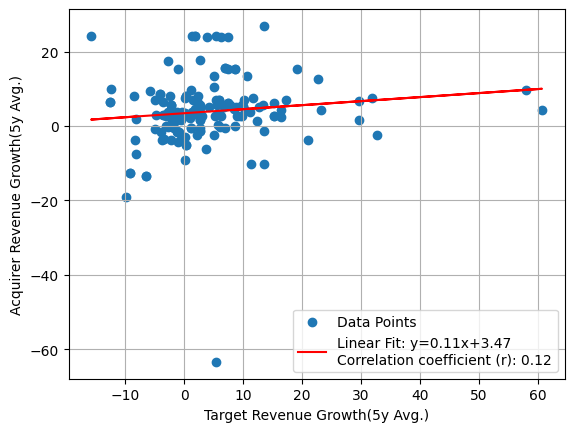

In [39]:
"""
plt.scatter(M_df['Target Revenue Growth(5y Avg.)'], M_df['Acquirer Revenue Growth(5y Avg.)'])
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.title('Scatter Plot')

plt.scatter(S_df['Target Revenue Growth(5y Avg.)'], S_df['Acquirer Revenue Growth(5y Avg.)'])
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.title('Scatter Plot')
plt.show()
"""
x = np.array(M_df['Target Revenue Growth(5y Avg.)'])
y = np.array(M_df['Acquirer Revenue Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure5-A. Reported Revenue Growth(5y Avg.) of M&A in Manufacturing Sectors')
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.show()

x = np.array(S_df['Target Revenue Growth(5y Avg.)'])
y = np.array(S_df['Acquirer Revenue Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.title('Figure5-B. Reported Revenue Growth(5y Avg.) of M&A in Service Sectors')
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.show()

x = np.array(F_df['Target Revenue Growth(5y Avg.)'])
y = np.array(F_df['Acquirer Revenue Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('Target Revenue Growth(5y Avg.)')
plt.ylabel('Acquirer Revenue Growth(5y Avg.)')
plt.show()

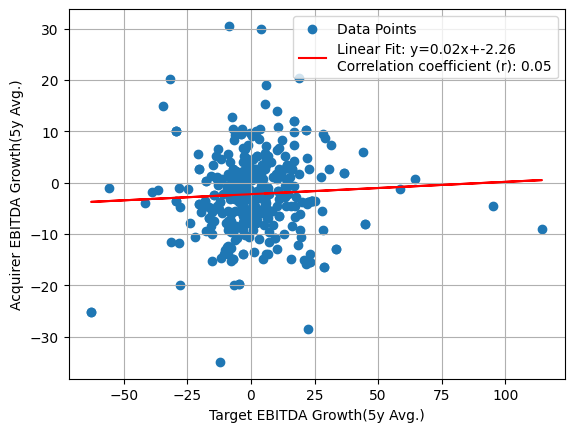

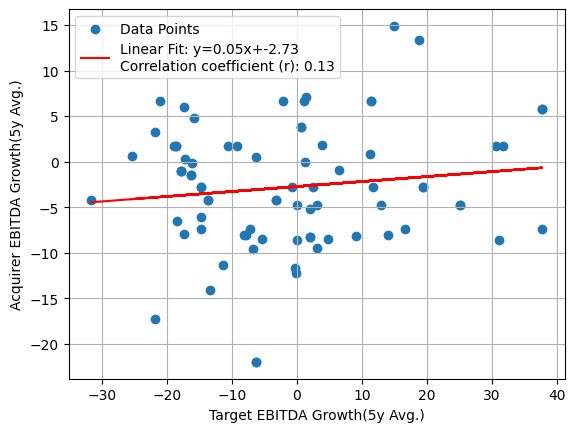

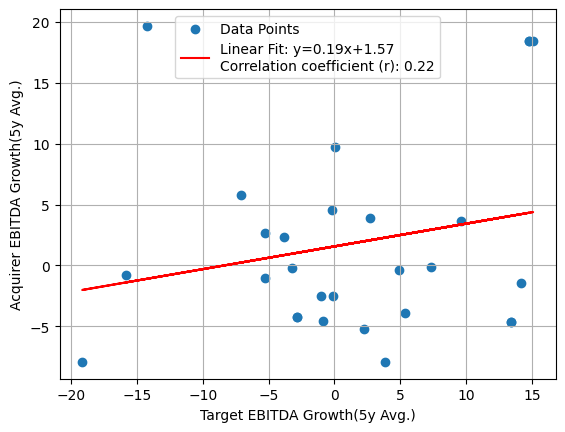

In [28]:
"""
plt.scatter(M_df['Target EBITDA Growth(5y Avg.)'], M_df['Acquirer EBITDA Growth(5y Avg.)'])
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.title('Scatter Plot')

plt.scatter(S_df['Target EBITDA Growth(5y Avg.)'], S_df['Acquirer EBITDA Growth(5y Avg.)'])
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.title('Scatter Plot')
plt.show()
"""

x = np.array(M_df['Target EBITDA Growth(5y Avg.)'])
y = np.array(M_df['Acquirer EBITDA Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.show()

x = np.array(S_df['Target EBITDA Growth(5y Avg.)'])
y = np.array(S_df['Acquirer EBITDA Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.show()

x = np.array(F_df['Target EBITDA Growth(5y Avg.)'])
y = np.array(F_df['Acquirer EBITDA Growth(5y Avg.)'])

# 関数の呼び出し
plot_scatter(x,y)
plt.xlabel('Target EBITDA Growth(5y Avg.)')
plt.ylabel('Acquirer EBITDA Growth(5y Avg.)')
plt.show()